<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW6_MLP_InteractiveVisualization_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Import Libraries and Read the Data from CSV

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl

In [ ]:
path = '/content/drive/My Drive/Underdog/data/Cleaned_Diameter_Asteroid_data.csv'

data = pd.read_csv(path, delimiter=',')

In [ ]:
data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,rot_per,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,0,0,939.400,0.0900,9.074170,1.59478,6,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,0,0,545.000,0.1010,7.813200,1.23324,6,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,0,0,246.596,0.2140,7.210000,1.03454,6,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,0,0,525.400,0.4228,5.342128,1.13948,6,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0.0,2916,6.85,0,0,106.699,0.2740,16.806000,1.09589,6,0.238632,1508.600458,282.366289


In [ ]:
data.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter          float64
albedo            float64
rot_per           float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object

In [ ]:
# data['diameter'] = data['diameter'].astype(float) 
# data['condition_code'] = data['condition_code'].astype(float) 
# data['neo'] = data['neo'].astype('category').cat.codes
# data['pha'] = data['pha'].astype('category').cat.codes
# data['class'] = data['class'].astype('category').cat.codes
data['diameter'] = data['diameter'].astype(float) 
data['condition_code'] = data['condition_code'].astype(float) 
data['neo'] = data['neo'].astype(float)
data['pha'] = data['pha'].astype(float)
data['class'] = data['class'].astype(float)

## 2. Feature Importance
Data Narrative : Random Forest Gini Importance and Permutation Importance got per_y as highest feature importance. 

Shap Values: Found the data_arc has the highest feature.

Choose the other features related to our project objective function


In [ ]:
# Let's load the packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
# Load the data set and split for training and testing.
column_name=['a','e','i','om','w','q','ad','per_y','data_arc','condition_code','n_obs_used','H','neo','pha','diameter','albedo','rot_per',
                                'moid','class','n','per','ma']
X = pd.DataFrame(data, columns=column_name) 
y = pd.DataFrame(data, columns=column_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
X, y

(             a         e          i  ...         n          per          ma
 0     2.769165  0.076009  10.594067  ...  0.213885  1683.145708   77.372096
 1     2.772466  0.230337  34.836234  ...  0.213503  1686.155999   59.699133
 2     2.669150  0.256942  12.988919  ...  0.226019  1592.787285   34.925016
 3     2.361418  0.088721   7.141771  ...  0.271609  1325.432765   95.861936
 4     2.574249  0.191095   5.366988  ...  0.238632  1508.600458  282.366289
 ...        ...       ...        ...  ...       ...          ...         ...
 5405  1.123117  0.214010  26.059847  ...  0.828069   434.746466  122.227258
 5406  2.536682  0.210917  12.961618  ...  0.243952  1475.697793  162.362861
 5407  2.676866  0.152296   6.417012  ...  0.225042  1599.699647  334.188693
 5408  0.864351  0.273428  13.248402  ...  1.226504   293.517284  189.605800
 5409  2.331445  0.218534  23.314698  ...  0.276864  1300.278239  181.191614
 
 [5410 rows x 22 columns],
              a         e          i  ...      

### Random Forest Gini Importance vs Permutation Importance

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
# Load the data set and split for training and testing.
column_name=['a','e','i','om','w','q','ad','per_y','data_arc','condition_code','n_obs_used','H','neo','pha','diameter','albedo','rot_per',
                                'moid','class','n','per','ma']
X = pd.DataFrame(data, columns=column_name) 
y = pd.DataFrame(data, columns=column_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
# Fit the Random Forest Regressor with 100 Decision Trees:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# To get the feature importances from the Random Forest model use the feature_importances_ argument:
rf.feature_importances_

array([2.96012509e-03, 1.46707342e-04, 1.27413983e-04, 8.18583440e-05,
       1.23444790e-04, 2.16367559e-03, 8.26389733e-03, 5.74061197e-03,
       9.56585903e-01, 2.36770047e-03, 3.16112685e-03, 1.53891223e-03,
       1.32595525e-05, 3.47335869e-06, 4.20395682e-03, 8.94757424e-05,
       6.72087028e-05, 2.37451028e-03, 1.43054784e-03, 5.66759509e-03,
       2.77021811e-03, 1.18377098e-04])

In [ ]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf.feature_importances_)
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually

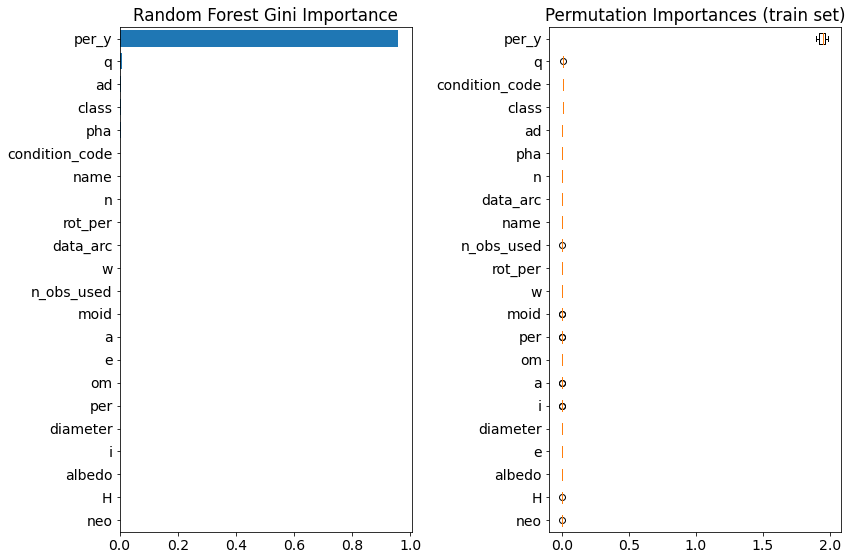

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         rf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(data.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(rf.feature_importances_)))
ax1.set_title("Random Forest Gini Importance")
ax2.set_title("Permutation Importances (train set)")
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=data.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

### Using Shap Values Feature Importance


In [ ]:
!pip install shap

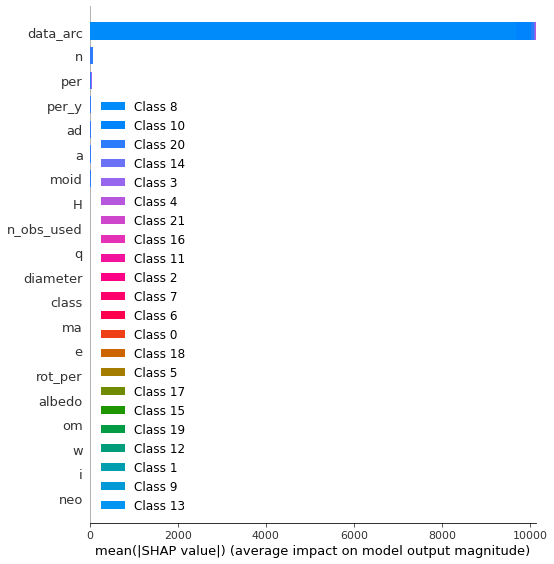

In [ ]:
# Feature importance using Training sample
import shap
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

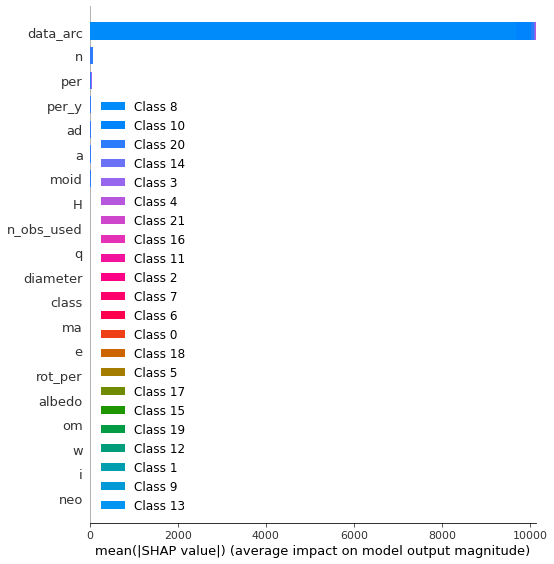

In [ ]:
# Feature importance using Test sample
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_test)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

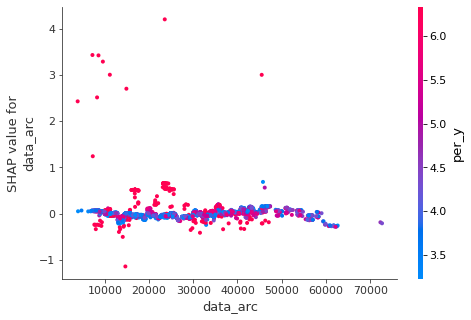

In [ ]:
shap.dependence_plot('data_arc', shap_values[0], X_train)

##3. Sampling Distribution

> ('Original data', (5410, 22), 'Up Sample', (9119, 1), 'Down Sample', (4344, 1))

> ('Original data', (5410, 1), 'Up Sample', (9137, 1), 'Down Sample', (4424, 1))






In [ ]:
# Upsampling Feature Importance
!pip install smogn

In [ ]:
X1 = data[['diameter']] 
y1 = data[['rot_per']]

Before Sampling original Diameter and rotation data Distribution

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


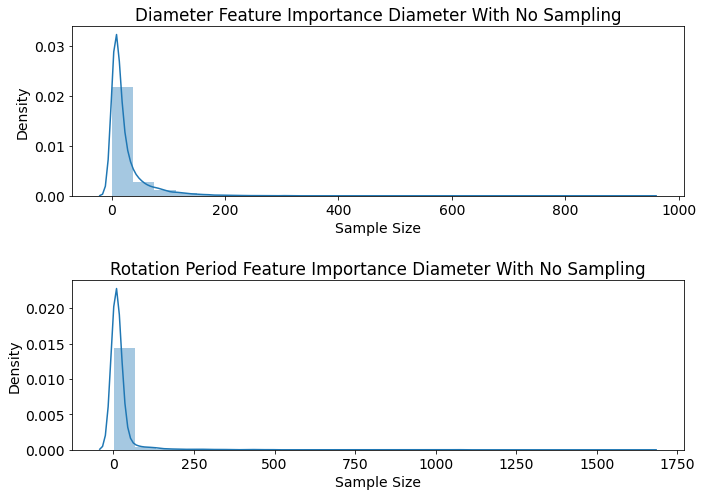

In [ ]:
# Before Sampling Feature Importance Distribution 
import matplotlib.pyplot as plt
import seaborn as sns

# X = data[['diameter']] 
_ = plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
g = sns.distplot(data.diameter, bins=25, kde=True)

plt.title('Diameter Feature Importance Diameter With No Sampling')
plt.ylabel('Density')
plt.xlabel('Sample Size')

ax2 = plt.subplot(212)
g = sns.distplot(data.rot_per, bins=25, kde=True)

plt.title('Rotation Period Feature Importance Diameter With No Sampling')
plt.ylabel('Density')
plt.xlabel('Sample Size')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

Down Sampling Distribution


In [ ]:
# Down Sampling
# The extreme values are considered rare "minorty" values are over-sampled. 
# The values closer the median are considered "majority" values and are under-sampled.
import smogn
## conduct smogn
feature_dia = smogn.smoter(
    
    data = X1,  ## pandas dataframe
    y = 'diameter'  ## string ('header name')
)




dist_matrix:   0%|          | 0/1066 [00:00<?, ?it/s]


dist_matrix:   0%|          | 1/1066 [00:00<03:24,  5.22it/s]


dist_matrix:   0%|          | 2/1066 [00:00<03:26,  5.16it/s]


dist_matrix:   0%|          | 3/1066 [00:00<03:28,  5.11it/s]


dist_matrix:   0%|          | 4/1066 [00:00<03:25,  5.17it/s]


dist_matrix:   0%|          | 5/1066 [00:00<03:27,  5.11it/s]


dist_matrix:   1%|          | 6/1066 [00:01<03:29,  5.07it/s]


dist_matrix:   1%|          | 7/1066 [00:01<03:29,  5.04it/s]


dist_matrix:   1%|          | 8/1066 [00:01<03:34,  4.94it/s]


dist_matrix:   1%|          | 9/1066 [00:01<03:31,  5.01it/s]


dist_matrix:   1%|          | 10/1066 [00:01<03:33,  4.95it/s]


dist_matrix:   1%|1         | 11/1066 [00:02<03:30,  5.01it/s]


dist_matrix:   1%|1         | 12/1066 [00:02<03:29,  5.03it/s]


dist_matrix:   1%|1         | 13/1066 [00:02<03:30,  4.99it/s]


dist_matrix:   1%|1         | 14/1066 [00:02<03:32,  4.95it/s]


dist_matrix:   1%|1         | 15/1066 [0

In [ ]:
# Down Sampling
# The extreme values are considered rare "minorty" values are over-sampled. 
# The values closer the median are considered "majority" values and are under-sampled.
import smogn
## conduct smogn
feature_rot_per = smogn.smoter(
    
    data = y1,  ## pandas dataframe
    y = 'rot_per'  ## string ('header name')
)




dist_matrix:   0%|          | 0/985 [00:00<?, ?it/s]


dist_matrix:   0%|          | 1/985 [00:00<02:52,  5.72it/s]


dist_matrix:   0%|          | 2/985 [00:00<02:52,  5.70it/s]


dist_matrix:   0%|          | 3/985 [00:00<02:56,  5.56it/s]


dist_matrix:   0%|          | 4/985 [00:00<02:58,  5.50it/s]


dist_matrix:   1%|          | 5/985 [00:00<02:58,  5.48it/s]


dist_matrix:   1%|          | 6/985 [00:01<03:00,  5.44it/s]


dist_matrix:   1%|          | 7/985 [00:01<02:58,  5.49it/s]


dist_matrix:   1%|          | 8/985 [00:01<03:03,  5.32it/s]


dist_matrix:   1%|          | 9/985 [00:01<03:01,  5.37it/s]


dist_matrix:   1%|1         | 10/985 [00:01<03:02,  5.34it/s]


dist_matrix:   1%|1         | 11/985 [00:02<02:59,  5.44it/s]


dist_matrix:   1%|1         | 12/985 [00:02<02:57,  5.48it/s]


dist_matrix:   1%|1         | 13/985 [00:02<02:55,  5.55it/s]


dist_matrix:   1%|1         | 14/985 [00:02<02:57,  5.46it/s]


dist_matrix:   2%|1         | 15/985 [00:02<02:59,  5.4

In [ ]:
feature_dia.shape

(4344, 1)

In [ ]:
feature_rot_per.shape

(4424, 1)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


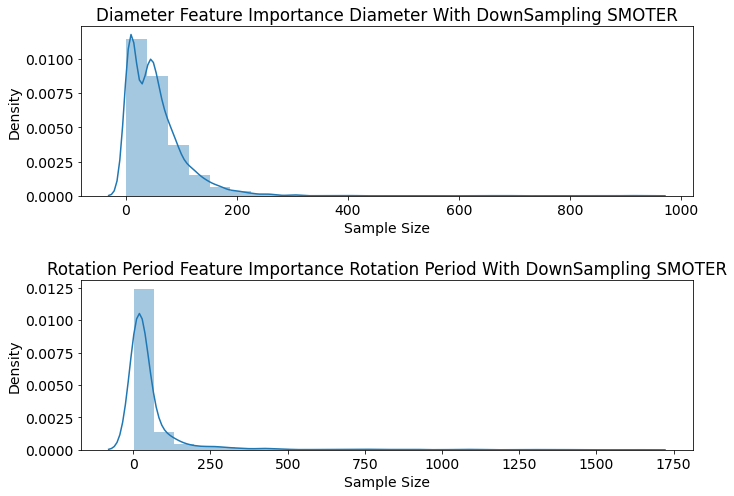

In [ ]:
# g = sns.distplot(feature_smogn, bins=25, kde=True)
# g.figure.set_size_inches(10,7)
# plt.title('Feature Importance Diameter With DownSampling SMOTER')
# plt.ylabel('Density')
# plt.xlabel('Sample Size')

# After Sampling Feature Importance Distribution 
import matplotlib.pyplot as plt
import seaborn as sns

# X = data[['diameter']] 
_ = plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
g = sns.distplot(feature_dia, bins=25, kde=True)

plt.title('Diameter Feature Importance Diameter With DownSampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

ax2 = plt.subplot(212)
g = sns.distplot(feature_rot_per, bins=25, kde=True)

plt.title('Rotation Period Feature Importance Rotation Period With DownSampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

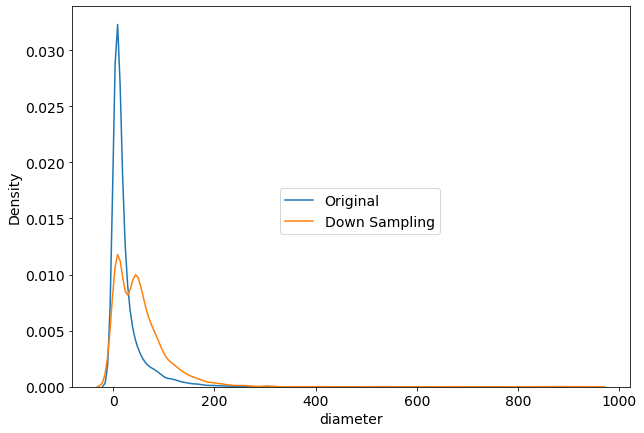

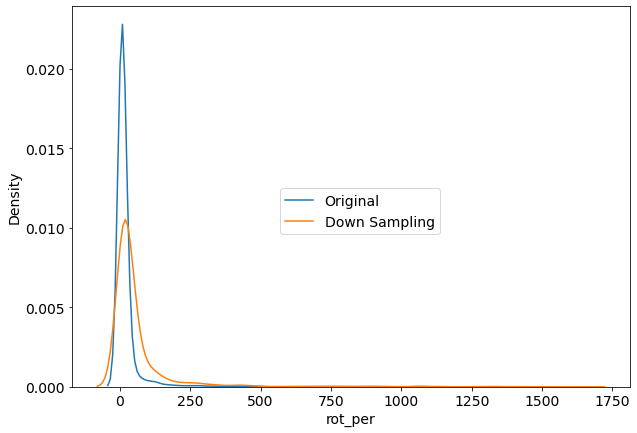

<Figure size 864x576 with 0 Axes>

In [ ]:
## plot y distribution 
fig = plt.figure(figsize=(10,7))

sns.kdeplot(X['diameter'], label = "Original")
sns.kdeplot(feature_dia['diameter'], label = "Down Sampling")
fig.legend(labels=['Original', 'Down Sampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

fig = plt.figure(figsize=(10,7))
sns.kdeplot(y1['rot_per'], label = "Original")
sns.kdeplot(feature_rot_per['rot_per'], label = "Down Sampling")
fig.legend(labels=['Original', 'Down Sampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

Up Sampling Distribution

In [ ]:
# Up Sampling
## conduct smogn
feature_dia1 = smogn.smoter(
    
    ## main arguments
    data = X1,           ## pandas dataframe
    y = 'diameter',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)

    # If 'extreme' is specified, more over/under-sampling is conducted. 
    # In this case, we input 'extreme' (default is 'balance') to aggressively over/under-sample with the following input: samp_method = 'extreme'
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    ## https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_2_int.ipynb

    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)





dist_matrix:   0%|          | 0/616 [00:00<?, ?it/s]



dist_matrix:   0%|          | 1/616 [00:00<01:14,  8.28it/s]



dist_matrix:   0%|          | 2/616 [00:00<01:13,  8.34it/s]



dist_matrix:   0%|          | 3/616 [00:00<01:14,  8.18it/s]



dist_matrix:   1%|          | 4/616 [00:00<01:15,  8.14it/s]



dist_matrix:   1%|          | 5/616 [00:00<01:14,  8.20it/s]



dist_matrix:   1%|          | 6/616 [00:00<01:13,  8.27it/s]



dist_matrix:   1%|1         | 7/616 [00:00<01:13,  8.27it/s]



dist_matrix:   1%|1         | 8/616 [00:00<01:13,  8.24it/s]



dist_matrix:   1%|1         | 9/616 [00:01<01:11,  8.44it/s]



dist_matrix:   2%|1         | 10/616 [00:01<01:12,  8.39it/s]



dist_matrix:   2%|1         | 11/616 [00:01<01:13,  8.27it/s]



dist_matrix:   2%|1         | 12/616 [00:01<01:12,  8.36it/s]



dist_matrix:   2%|2         | 13/616 [00:01<01:12,  8.33it/s]



dist_matrix:   2%|2         | 14/616 [00:01<01:12,  8.32it/s]



dist_matrix:   2%|2         | 15/616 [0

In [ ]:
# Up Sampling
## conduct smogn
feature1_rot_per = smogn.smoter(
    
    ## main arguments
    data = y1,           ## pandas dataframe
    y = 'rot_per',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)

    # If 'extreme' is specified, more over/under-sampling is conducted. 
    # In this case, we input 'extreme' (default is 'balance') to aggressively over/under-sample with the following input: samp_method = 'extreme'
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    ## https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_2_int.ipynb

    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)





dist_matrix:   0%|          | 0/601 [00:00<?, ?it/s]



dist_matrix:   0%|          | 1/601 [00:00<01:14,  8.09it/s]



dist_matrix:   0%|          | 2/601 [00:00<01:13,  8.12it/s]



dist_matrix:   0%|          | 3/601 [00:00<01:11,  8.41it/s]



dist_matrix:   1%|          | 4/601 [00:00<01:10,  8.50it/s]



dist_matrix:   1%|          | 5/601 [00:00<01:09,  8.60it/s]



dist_matrix:   1%|          | 6/601 [00:00<01:08,  8.73it/s]



dist_matrix:   1%|1         | 7/601 [00:00<01:08,  8.67it/s]



dist_matrix:   1%|1         | 8/601 [00:00<01:08,  8.70it/s]



dist_matrix:   1%|1         | 9/601 [00:01<01:11,  8.27it/s]



dist_matrix:   2%|1         | 10/601 [00:01<01:10,  8.34it/s]



dist_matrix:   2%|1         | 11/601 [00:01<01:10,  8.39it/s]



dist_matrix:   2%|1         | 12/601 [00:01<01:09,  8.51it/s]



dist_matrix:   2%|2         | 13/601 [00:01<01:08,  8.63it/s]



dist_matrix:   2%|2         | 14/601 [00:01<01:07,  8.63it/s]



dist_matrix:   2%|2         | 15/601 [0

In [ ]:
feature_dia1.shape

(9119, 1)

In [ ]:
feature1_rot_per.shape

(9137, 1)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


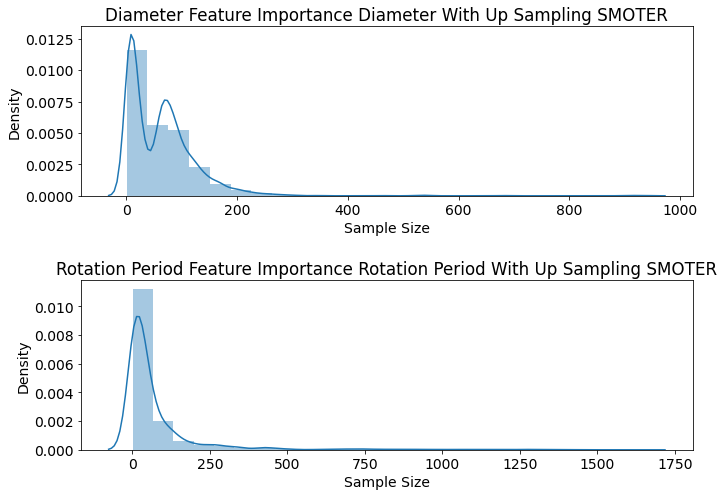

In [ ]:
# After Sampling Feature Importance Distribution 
import matplotlib.pyplot as plt
import seaborn as sns

# X = data[['diameter']] 
_ = plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
g = sns.distplot(feature_dia1, bins=25, kde=True)

plt.title('Diameter Feature Importance Diameter With Up Sampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

ax2 = plt.subplot(212)
g = sns.distplot(feature1_rot_per, bins=25, kde=True)

plt.title('Rotation Period Feature Importance Rotation Period With Up Sampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

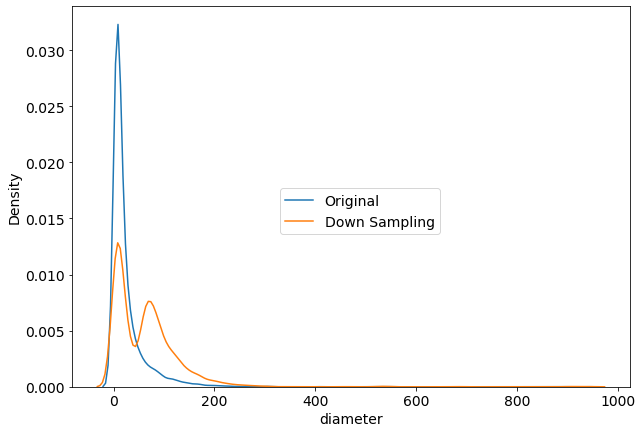

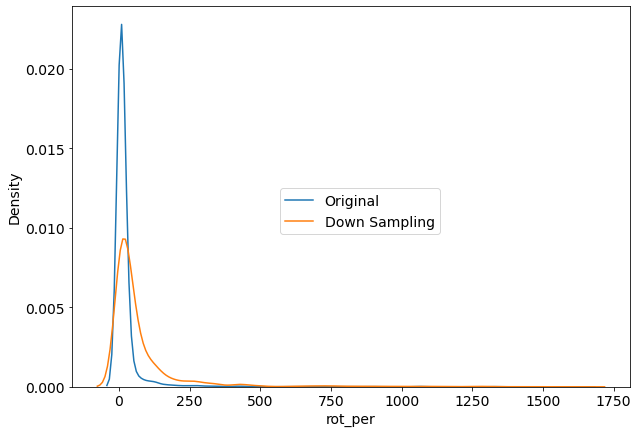

<Figure size 864x576 with 0 Axes>

In [ ]:
## plot y distribution 
fig = plt.figure(figsize=(10,7))

sns.kdeplot(X['diameter'], label = "Original")
sns.kdeplot(feature_dia1['diameter'], label = "Up Sampling")
fig.legend(labels=['Original', 'Down Sampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

fig = plt.figure(figsize=(10,7))
sns.kdeplot(y1['rot_per'], label = "Original")
sns.kdeplot(feature1_rot_per['rot_per'], label = "Up Sampling")
fig.legend(labels=['Original', 'Down Sampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [ ]:
# Sampling Size Summary

table = ('Original data', X.shape, 'Up Sample', feature_dia1.shape, 'Down Sample', feature_dia.shape)

table1 = ('Original data', y1.shape, 'Up Sample', feature1_rot_per.shape, 'Down Sample', feature_rot_per.shape)

display(table)
display(table1)

('Original data', (5410, 22), 'Up Sample', (9119, 1), 'Down Sample', (4344, 1))

('Original data', (5410, 1), 'Up Sample', (9137, 1), 'Down Sample', (4424, 1))

In [ ]:
X1 = X1
X2 = feature_dia1
X3 = feature_dia
y1 = y1
y2 = feature1_rot_per
y3 = feature_rot_per

In [ ]:
y1 = y1.astype(int)
y2 = y2.astype(int)
y3 = y3.astype(int)

y2 = (y2[:9119])
y3 = (y3[:4344])

In [ ]:
# to_remove excess rows
print(y2.shape)
y3.shape

(9119, 1)


(4344, 1)

##4. Muller Loop Classifier Feature Importance

Original Diameter Feature - No Sampling

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.model_selection import train_test_split
import time
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = data[['rot_per']] 


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)

#second error need to convert column vector y to an 1D array as expected for training one feature
y_train = y_train.values.ravel()

# First error
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# X_train= X_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)


# names = ["Decision Tree", "MLP Neural Net"]

names = ["Gradient Boosting","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

# classifiers = [
    
#     DecisionTreeClassifier(max_depth=5),
#     MLPClassifier(solver='adam',alpha=1, max_iter=1000)
#     ]
classifiers = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, solver='adam', max_iter=1000),
    AdaBoostClassifier(),
    ]

output = pd.DataFrame(columns=['classifier','mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):

    start_time = time.process_time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    score = 100.0 * clf.score(X_test, y_test)

    # score = metrics.accuracy_score(y_test, y_predict)
  
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name,'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
   
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
display(output)

Classifier = Gradient Boosting, Score (test, accuracy) = 0.68
Classifier = Nearest Neighbors, Score (test, accuracy) = 8.81
Classifier = Linear SVM, Score (test, accuracy) = 13.06
Classifier = RBF SVM, Score (test, accuracy) = 12.51
Classifier = Gaussian Process, Score (test, accuracy) = 12.01
Classifier = Decision Tree, Score (test, accuracy) = 12.57
Classifier = Random Forest, Score (test, accuracy) = 13.62
Classifier = Neural Net, Score (test, accuracy) = 11.28
--------------------------------------------------------------------------------
Best --> Classifier = Random Forest, Score (test, accuracy) = 13.62


,classifier,mae,mse,Rsquared,accuracy
0,Gradient Boosting,82.84,20082.30,-1.97,0.677757
1,Nearest Neighbors,19.11,7032.74,-0.04,8.810844
2,Linear SVM,19.13,7111.51,-0.05,13.062230
3,RBF SVM,18.75,7077.40,-0.05,12.507702
4,Gaussian Process,18.88,7092.62,-0.05,12.014787
5,Decision Tree,18.75,7083.24,-0.05,12.569316
6,Random Forest,18.59,7075.75,-0.05,13.616759
7,Neural Net,20.06,6979.55,-0.03,11.275416


In [ ]:
# print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_test, y_predict))
# metrics.plot_roc_curve(clf, X_test, y_test)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       110
           3       0.18      0.84      0.30       194
           4       0.21      0.09      0.12       139
           5       0.00      0.00      0.00       135
           6       0.00      0.00      0.00       129
           7       0.04      0.03      0.03       100
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00        78
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00        52
          12       0.00      0.00      0.00        54
          13       0.00      0.00      0.00        33
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        34
          16       0.00      0.00      0.00        29
          17       0.00      0.00      0.00        26
          18       0.00      0.00      0.00        24
          19       0.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


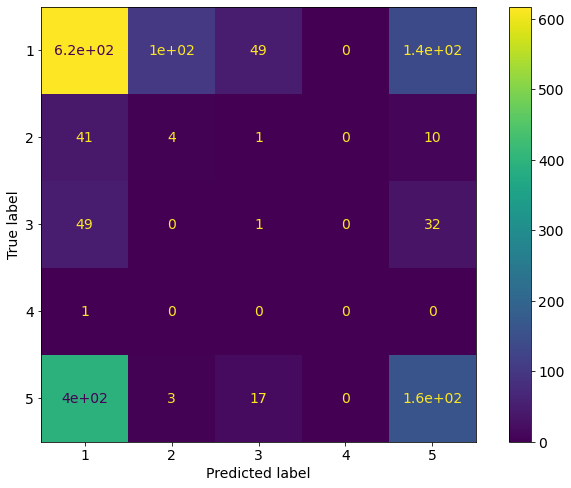

In [ ]:
  plot_confusion_matrix(clf, y_test, y_predict) 

Up Sample

In [ ]:
from sklearn.model_selection import train_test_split
import time
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = data[['rot_per']] 


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)

#second error need to convert column vector y to an 1D array as expected for training one feature
y_train = y_train.values.ravel()

# names = ["Decision Tree", "MLP Neural Net"]
names = ["Decision Tree", "MLP Neural Net", "RandomForestClassifier"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(solver='adam',alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ]
output = pd.DataFrame(columns=['classifier','mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):

    start_time = time.process_time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    score = 100.0 * clf.score(X_test, y_test)

    score = metrics.accuracy_score(y_test, y_predict)
  
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name,'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
   
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
display(output)

Classifier = Decision Tree, Score (test, accuracy) = 0.14
Classifier = MLP Neural Net, Score (test, accuracy) = 0.14
Classifier = RandomForestClassifier, Score (test, accuracy) = 0.19
--------------------------------------------------------------------------------
Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 0.19


,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,56.82,27386.44,-0.04,0.138523
1,MLP Neural Net,45.98,24467.26,0.07,0.144737
2,RandomForestClassifier,56.59,27408.93,-0.04,0.190424


In [ ]:
# print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_test, y_predict))
# metrics.plot_roc_curve(clf, X_test, y_test)
# plt.show()

              precision    recall  f1-score   support

           2       0.07      0.02      0.03        90
           3       0.13      0.70      0.22       165
           4       0.07      0.03      0.04       112
           5       0.10      0.15      0.12       128
           6       0.06      0.05      0.06       114
           7       0.12      0.02      0.04        93
           8       0.00      0.00      0.00        86
           9       0.00      0.00      0.00        56
          10       0.00      0.00      0.00        58
          11       0.00      0.00      0.00        45
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        24
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        32
          16       0.33      0.03      0.06        31
          17       0.00      0.00      0.00        20
          18       0.00      0.00      0.00        20
          19       0.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Down Sample

In [361]:
from sklearn.model_selection import train_test_split
import time
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = data[['rot_per']] 


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)

#second error need to convert column vector y to an 1D array as expected for training one feature
y_train = y_train.values.ravel()

# names = ["Decision Tree", "MLP Neural Net"]
names = ["Decision Tree", "MLP Neural Net", "RandomForestClassifier"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(solver='adam',alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ]
output = pd.DataFrame(columns=['classifier','mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):

    start_time = time.process_time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    score = 100.0 * clf.score(X_test, y_test)

    score = metrics.accuracy_score(y_test, y_predict)
  
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name,'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
   
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
display(output)

Classifier = Decision Tree, Score (test, accuracy) = 0.14
Classifier = MLP Neural Net, Score (test, accuracy) = 0.10
Classifier = RandomForestClassifier, Score (test, accuracy) = 0.18
--------------------------------------------------------------------------------
Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 0.18


,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,63.33,31839.48,-0.06,0.141813
1,MLP Neural Net,50.65,27924.17,0.07,0.104532
2,RandomForestClassifier,57.61,29539.89,0.01,0.182018


In [362]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.12      0.01      0.02        90
           3       0.15      0.79      0.25       185
           4       0.04      0.05      0.05       111
           5       0.12      0.11      0.12       134
           6       0.07      0.01      0.02       113
           7       0.00      0.00      0.00        87
           8       0.17      0.01      0.02        80
           9       0.00      0.00      0.00        74
          10       0.00      0.00      0.00        46
          11       0.00      0.00      0.00        52
          12       0.00      0.00      0.00        50
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00        36
          16       0.00      0.00      0.00        22
          17       0.00      0.00      0.00        23
          18       0.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


##5. Muller Loop Regression

In [363]:
from sklearn import metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)
y_train = y_train.values.ravel()
names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [364]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor    mae       mse  Rsquared     accuracy
0  Nearest Neighbors  35.66  10894.54     -0.97   -96.789914
1         Linear SVR  18.65   5786.56     -0.05    -4.523596
2   Gaussian Process  48.59  66725.07    -11.05 -1105.266155
3      Decision Tree  42.37  21309.22     -2.85  -284.911984
4      Random Forest  27.45   6116.34     -0.10   -10.480498
5                MLP  26.27   5533.40      0.00     0.049339
6           AdaBoost  88.31  15083.90     -1.72  -172.462933
--------------------------------------------------------------------------------
Best --> Regression = MLP, Score (accuracy) = 0.05


Up Sample Muller Loop

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)
y_train = y_train.values.ravel()
names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [ ]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor     mae           mse  Rsquared      accuracy
0  Nearest Neighbors   74.54  3.262828e+04     -0.30 -2.977860e+01
1         Linear SVR   42.39  2.264747e+04      0.10  9.919928e+00
2   Gaussian Process  577.66  2.752822e+08 -10948.32 -1.094832e+06
3      Decision Tree   72.68  4.118534e+04     -0.64 -6.381423e+01
4      Random Forest   64.08  2.154181e+04      0.14  1.431770e+01
5                MLP   65.35  2.230776e+04      0.11  1.127112e+01
6           AdaBoost  183.47  5.248477e+04     -1.09 -1.087576e+02
--------------------------------------------------------------------------------
Best --> Regression = Random Forest, Score (accuracy) = 14.32


Down Sample Muller Loop

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.30)
y_train = y_train.values.ravel()
names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [366]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor     mae           mse  Rsquared      accuracy
0  Nearest Neighbors   72.35  3.159198e+04     -0.21 -2.149731e+01
1         Linear SVR   44.55  2.340566e+04      0.10  9.985856e+00
2   Gaussian Process  646.18  2.928206e+08 -11260.38 -1.126038e+06
3      Decision Tree   74.93  3.798928e+04     -0.46 -4.610024e+01
4      Random Forest   64.77  2.192066e+04      0.16  1.569690e+01
5                MLP   63.75  2.218123e+04      0.15  1.469480e+01
6           AdaBoost  204.46  5.492653e+04     -1.11 -1.112380e+02
--------------------------------------------------------------------------------
Best --> Regression = Random Forest, Score (accuracy) = 15.70
